In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import itertools
import warnings
warnings.filterwarnings('ignore')


In [2]:
from pyforest import*
lazy_imports()  #With the help of lazy_import we can see the different different library which comes in pyforest.

['import glob',
 'from openpyxl import load_workbook',
 'from scipy import stats',
 'import sklearn',
 'from sklearn.preprocessing import RobustScaler',
 'from sklearn.impute import SimpleImputer',
 'from PIL import Image',
 'import lightgbm as lgb',
 'from dask import dataframe as dd',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import plotly.express as px',
 'import statistics',
 'import pandas as pd',
 'from sklearn.linear_model import LogisticRegression',
 'from sklearn.linear_model import Ridge',
 'from sklearn.ensemble import RandomForestClassifier',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import xgboost as xgb',
 'import spacy',
 'from sklearn.cluster import KMeans',
 'from xlrd import open_workbook',
 'from sklearn.decomposition import PCA',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from sklearn.linear_model import ElasticNetCV',
 'from sklearn.linear_model import LassoCV',
 'import keras',
 'from sklearn import metrics',
 'i

In [3]:
data = pd.read_csv(r"C:\Users\HP\Downloads\compresive_strength_concrete+2.csv")

<IPython.core.display.Javascript object>

In [4]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [7]:
data.shape

(1030, 9)

In [8]:
# Here we short the names of the different columns.with the help of rename keyword.
data = data.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'Cement',
                           'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Slag',
                           'Fly Ash (component 3)(kg in a m^3 mixture)':'Ash',
                           'Water  (component 4)(kg in a m^3 mixture)':'Water',
                           'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplastic',
                           'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarseagg',
                           'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fineagg',
                           'Age (day)':'Age',
                           'Concrete compressive strength(MPa, megapascals) ':'Strength'})

In [9]:
data.head()

,Cement,Slag,Ash,Water,Superplastic,Coarseagg,Fineagg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
# ALTERNATIVELY WE CAN USE THIS ALSO:
# df.columns = ['cement', 'slag', 'ash', 'Water','superplastic','coarseagg','fineagg','age','strength']

In [11]:
data.dtypes

Cement          float64
Slag            float64
Ash             float64
Water           float64
Superplastic    float64
Coarseagg       float64
Fineagg         float64
Age               int64
Strength        float64
dtype: object

In [12]:
data.isnull().sum()

Cement          0
Slag            0
Ash             0
Water           0
Superplastic    0
Coarseagg       0
Fineagg         0
Age             0
Strength        0
dtype: int64

In [13]:
# It gives the descriptive statistics and count of the column.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## EXPLORATORY DATA ANALYSIS

In [14]:
data.head(2)

,Cement,Slag,Ash,Water,Superplastic,Coarseagg,Fineagg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89


### BOXPLOT

### CEMENT

In [15]:
# Quartiles

from scipy import stats

Q1 = data['Cement'].quantile(q=0.25)
Q3 = data['Cement'].quantile(q=0.75)

print('1st Quartiles (Q1) is : ',Q1)
print('3rd Quartiles (Q3) is : ',Q3)

print('Interquartile range (IQR) is:',Q3-Q1)

1st Quartiles (Q1) is :  192.375
3rd Quartiles (Q3) is :  350.0
Interquartile range (IQR) is: 157.625


In [16]:
# Outliers detection from Interquartile range(IQR) in original data.

Lower_outliers = Q1-1.5*(Q3-Q1) #Q1-1.5*Interquartile Range.
Upper_outliers = Q3+1.5*(Q3-Q1)

print('Lower limit outliers  in cement is ',Lower_outliers)
print('Upper limit outliers  in cement is ',Upper_outliers)

Lower limit outliers  in cement is  -44.0625
Upper limit outliers  in cement is  586.4375


In [17]:
# Checking the presence of outliers in lower and upper limit
print('Number of outliers in upper',data[data['Cement']>Upper_outliers]['Cement'].count())
print('Number of outliers in lower',data[data['Cement']<Lower_outliers]['Cement'].count())

Number of outliers in upper 0
Number of outliers in lower 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Cement'>

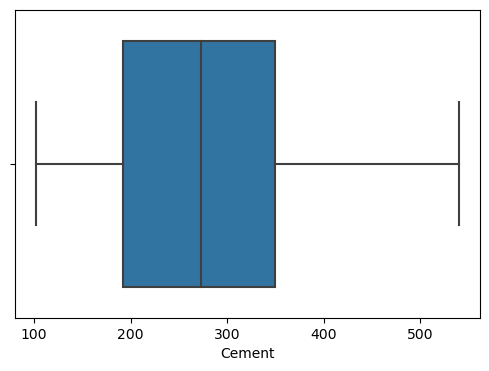

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Cement',data=data,orient='h')

### WATER

In [19]:
# Quartiles

Water_quartile_Q1 = data['Water'].quantile(q=0.25)
Water_quartile_Q3 = data['Water'].quantile(q=0.75)

print('1st quartile of water is :',Water_quartile_Q1)
print('3rd quartile of water is :',Water_quartile_Q3)

print('The interquantile range of water is:',Water_quartile_Q3-Water_quartile_Q1)

1st quartile of water is : 164.9
3rd quartile of water is : 192.0
The interquantile range of water is: 27.099999999999994


In [20]:
# Outliers detection from interquantile range

lower_range_water = Water_quartile_Q1-1.5*(Water_quartile_Q3-Water_quartile_Q1)
upper_range_water = Water_quartile_Q3+1.5*(Water_quartile_Q3-Water_quartile_Q1)

print('The lower limit of the outliers in water is ',lower_range_water)
print('The upper limit of the outliers in water is ',upper_range_water)

The lower limit of the outliers in water is  124.25000000000001
The upper limit of the outliers in water is  232.64999999999998


In [21]:
# Checking the presence of outliers in lower and upper limit
print('Number of outliers in upper',data[data['Water']>upper_range_water]['Water'].count())
print('Number of outliers in lower',data[data['Water']<lower_range_water]['Water'].count())

Number of outliers in upper 4
Number of outliers in lower 5


In [22]:
print('These are the value which is greater then the upper outlier limit and there are only 4:\n')
data[data['Water']>232.4]


These are the value which is greater then the upper outlier limit and there are only 4:



,Cement,Slag,Ash,Water,Superplastic,Coarseagg,Fineagg,Age,Strength
862,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
873,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
936,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
1019,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23


In [23]:
print('These are the value which is lower then the lower outlier limit and there are only 5:')
data[data['Water']<124.25]

These are the value which is lower then the lower outlier limit and there are only 5:


,Cement,Slag,Ash,Water,Superplastic,Coarseagg,Fineagg,Age,Strength
224,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
225,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82
226,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
227,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
228,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Water'>

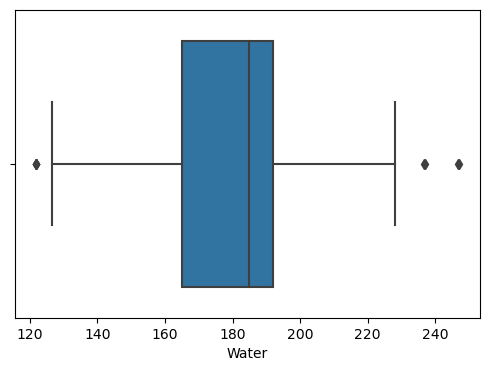

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Water',data=data)

### SLUG

In [25]:
# Quartiles

Slag_quartile_Q1 = data['Slag'].quantile(q=0.25)
Slag_quartile_Q3 = data['Slag'].quantile(q=0.75)

print('1st quartile of Slag is :',Slag_quartile_Q1)
print('3rd quartile of Slag is :',Slag_quartile_Q3)

print('The interquantile range of water is:',Slag_quartile_Q3-Slag_quartile_Q1)

1st quartile of Slag is : 0.0
3rd quartile of Slag is : 142.95
The interquantile range of water is: 142.95


In [26]:
# Outliers detection from interquantile range

lower_range_Slag = Slag_quartile_Q1-1.5*(Slag_quartile_Q3-Slag_quartile_Q1)
upper_range_Slag = Slag_quartile_Q3+1.5*(Slag_quartile_Q3-Slag_quartile_Q1)

print('The lower limit of the outliers in Slag is ',lower_range_Slag)
print('The upper limit of the outliers in Slag is ',upper_range_Slag)

The lower limit of the outliers in Slag is  -214.42499999999998
The upper limit of the outliers in Slag is  357.375


In [27]:
# Checking the presence of outliers in lower and upper limit
print('Number of outliers in upper',data[data['Slag']>upper_range_Slag]['Slag'].count())
print('Number of outliers in lower',data[data['Slag']<lower_range_Slag]['Slag'].count())

Number of outliers in upper 2
Number of outliers in lower 0


In [28]:
print('These are the value which is greater then the upper outlier limit and there are only 2:\n')
data[data['Slag']>357.375]


These are the value which is greater then the upper outlier limit and there are only 2:



,Cement,Slag,Ash,Water,Superplastic,Coarseagg,Fineagg,Age,Strength
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42
559,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Slag'>

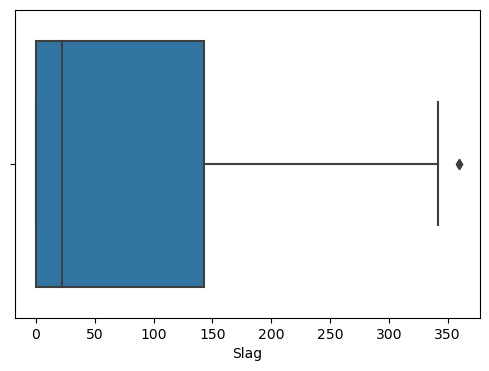

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Slag',data=data)

### AGE

In [30]:
# Quartiles

Age_quartile_Q1 = data['Age'].quantile(q=0.25)
Age_quartile_Q3 = data['Age'].quantile(q=0.75)

print('1st quartile of Age is :',Age_quartile_Q1)
print('3rd quartile of Age is :',Age_quartile_Q3)

print('The interquantile range of Age is:',Age_quartile_Q3-Age_quartile_Q1)

1st quartile of Age is : 7.0
3rd quartile of Age is : 56.0
The interquantile range of Age is: 49.0


In [31]:
# Outliers detection from interquantile range

lower_range_Age = Age_quartile_Q1-1.5*(Age_quartile_Q3-Age_quartile_Q1)
upper_range_Age = Age_quartile_Q3+1.5*(Age_quartile_Q3-Age_quartile_Q1)

print('The lower limit of the outliers in Age is ',lower_range_Age)
print('The upper limit of the outliers in Age is ',upper_range_Age)

The lower limit of the outliers in Age is  -66.5
The upper limit of the outliers in Age is  129.5


In [32]:
# Checking the presence of outliers in lower and upper limit
print('Number of outliers in upper',data[data['Age']>upper_range_Age]['Age'].count())
print('Number of outliers in lower',data[data['Age']<lower_range_Age]['Age'].count())

Number of outliers in upper 59
Number of outliers in lower 0


In [33]:
print('These are the value which is greater then the upper outlier limit and there are only 59:\n')
data[data['Age']>129.5].head()

These are the value which is greater then the upper outlier limit and there are only 59:



,Cement,Slag,Ash,Water,Superplastic,Coarseagg,Fineagg,Age,Strength
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
12,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270,43.01


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Age'>

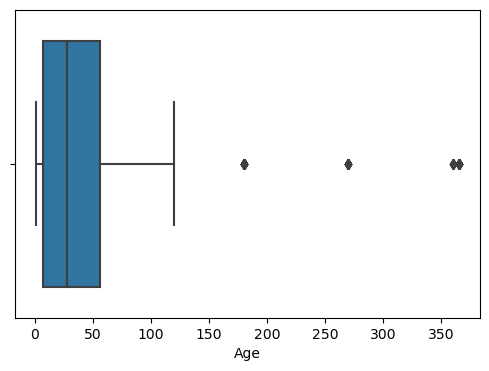

In [34]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Age',data=data)

In [35]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


### ASH

In [36]:
# Quartiles

Ash_quartile_Q1 = data['Ash'].quantile(q=0.25)
Ash_quartile_Q3 = data['Ash'].quantile(q=0.75)

print('1st quartile of Ash is :',Ash_quartile_Q1)
print('3rd quartile of Ash is :',Ash_quartile_Q3)

print('The interquantile range of Ash is:',Ash_quartile_Q3-Ash_quartile_Q1)

1st quartile of Ash is : 0.0
3rd quartile of Ash is : 118.3
The interquantile range of Ash is: 118.3


In [37]:
# Outliers detection from interquantile range

lower_range_Ash  = Ash_quartile_Q1-1.5*(Ash_quartile_Q3-Ash_quartile_Q1)
upper_range_Ash  = Ash_quartile_Q3+1.5*(Ash_quartile_Q3-Ash_quartile_Q1)

print('The lower limit of the outliers in Ash is ',lower_range_Ash)
print('The upper limit of the outliers in Ash is ',upper_range_Ash)

The lower limit of the outliers in Ash is  -177.45
The upper limit of the outliers in Ash is  295.75


In [38]:
# Checking the presence of outliers in lower and upper limit
print('Number of outliers in upper',data[data['Ash']>upper_range_Ash]['Ash'].count())
print('Number of outliers in lower',data[data['Ash']<lower_range_Ash]['Ash'].count())

Number of outliers in upper 0
Number of outliers in lower 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Ash'>

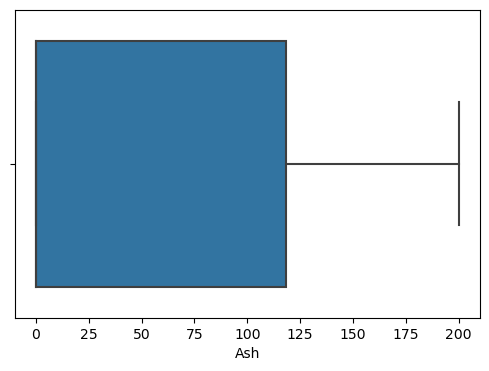

In [39]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Ash',data=data)

### COARSEAGG

In [40]:
# Quartiles

Coarseagg_quartile_Q1 = data['Coarseagg'].quantile(q=0.25)
Coarseagg_quartile_Q3 = data['Coarseagg'].quantile(q=0.75)

print('1st quartile of Ash is :',Coarseagg_quartile_Q1)
print('3rd quartile of Ash is :',Coarseagg_quartile_Q3)

print('The interquantile range of Coarseagg is:',Coarseagg_quartile_Q3-Coarseagg_quartile_Q1)

1st quartile of Ash is : 932.0
3rd quartile of Ash is : 1029.4
The interquantile range of Coarseagg is: 97.40000000000009


In [41]:
# Outliers detection from interquantile range

lower_range_Coarseagg  = Coarseagg_quartile_Q1-1.5*(Coarseagg_quartile_Q3-Coarseagg_quartile_Q1)
upper_range_Coarseagg  = Coarseagg_quartile_Q3+1.5*(Coarseagg_quartile_Q3-Coarseagg_quartile_Q1)

print('The lower limit of the outliers in Coarseagg is ',lower_range_Coarseagg)
print('The upper limit of the outliers in Coarseagg is ',upper_range_Coarseagg)

The lower limit of the outliers in Coarseagg is  785.8999999999999
The upper limit of the outliers in Coarseagg is  1175.5000000000002


In [42]:
# Checking the presence of outliers in lower and upper limit
print('Number of outliers in upper',data[data['Coarseagg']>upper_range_Coarseagg]['Coarseagg'].count())
print('Number of outliers in lower',data[data['Coarseagg']<lower_range_Coarseagg]['Coarseagg'].count())

Number of outliers in upper 0
Number of outliers in lower 0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Coarseagg'>

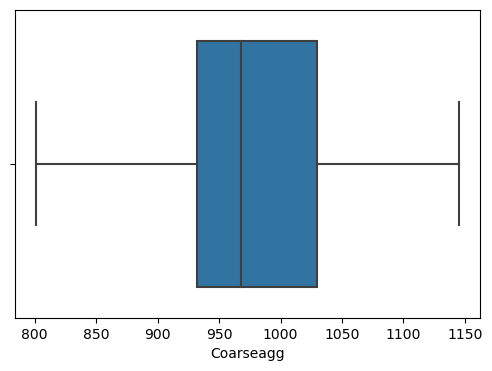

In [43]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Coarseagg',data=data)

## MULTIVARIATE ANALYSIS

### DISTPLOT

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Axes: xlabel='Strength', ylabel='Density'>

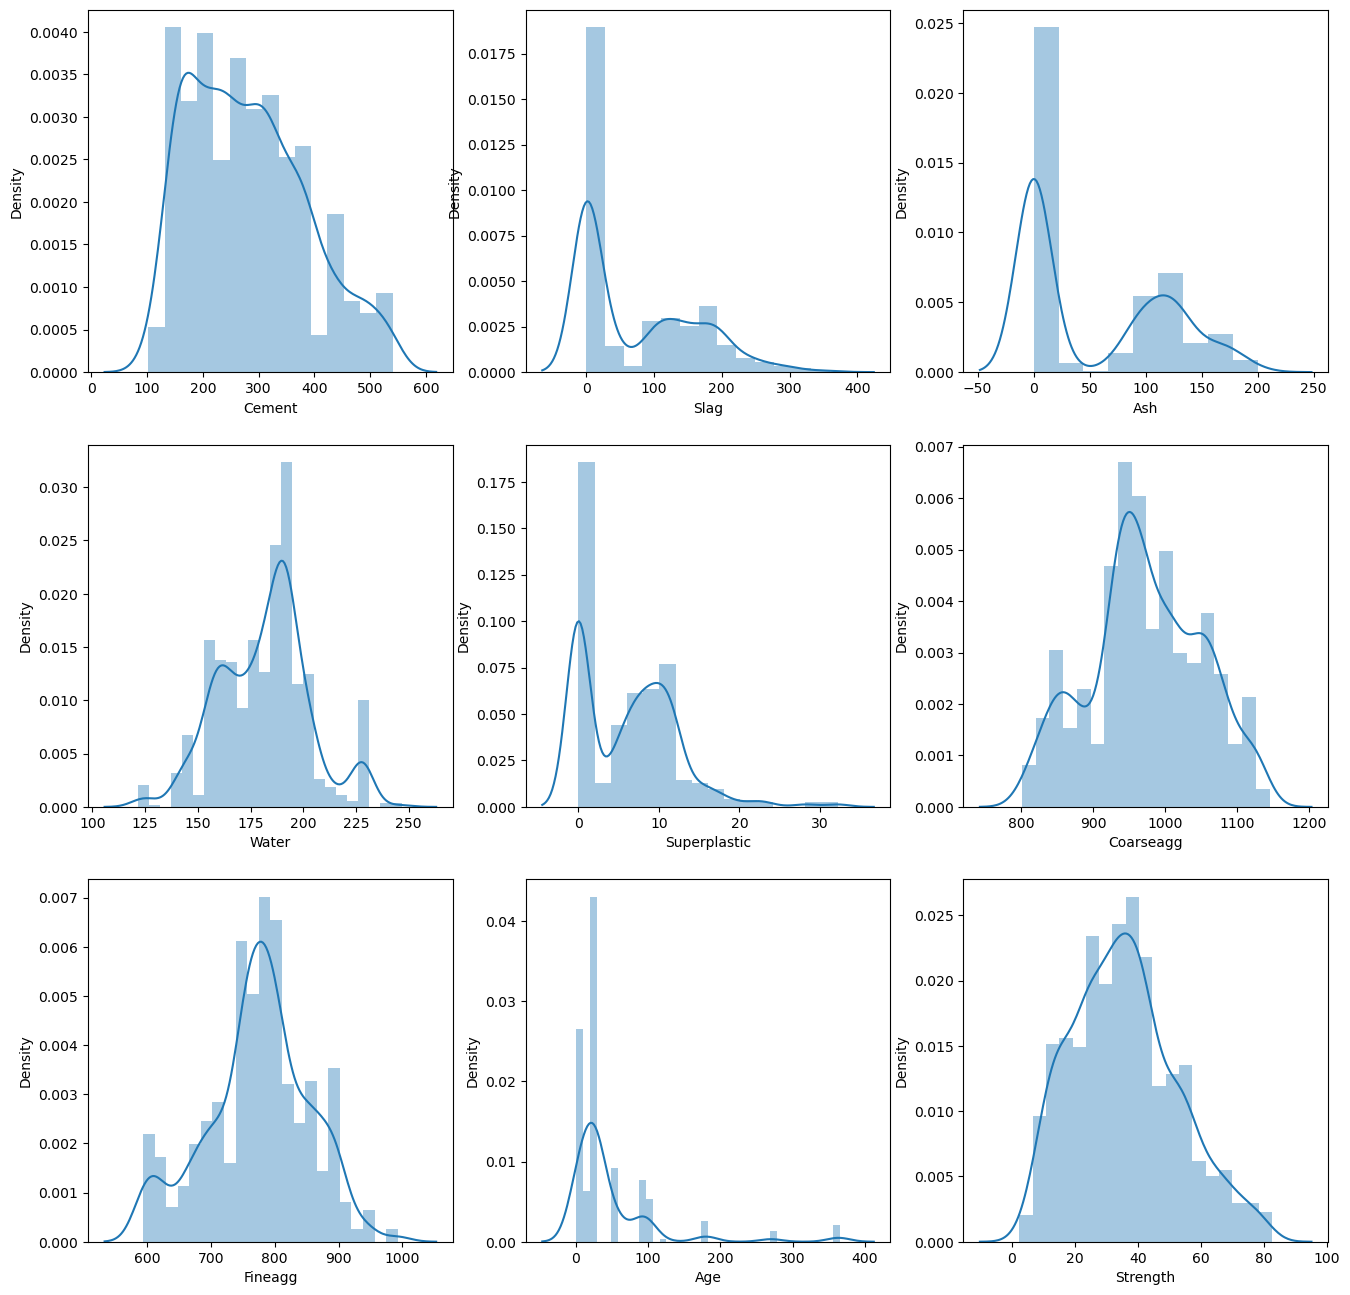

In [44]:

fig,ax2 = plt.subplots(3,3,figsize=(16,16))
sns.distplot(data['Cement'],ax=ax2[0][0])
sns.distplot(data['Slag'],ax=ax2[0][1])
sns.distplot(data['Ash'],ax=ax2[0][2])
sns.distplot(data['Water'],ax=ax2[1][0])
sns.distplot(data['Superplastic'],ax=ax2[1][1])
sns.distplot(data['Coarseagg'],ax=ax2[1][2])
sns.distplot(data['Fineagg'],ax=ax2[2][0])
sns.distplot(data['Age'],ax=ax2[2][1])
sns.distplot(data['Strength'],ax=ax2[2][2])

### PAIRPLOT

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 600x500 with 0 Axes>

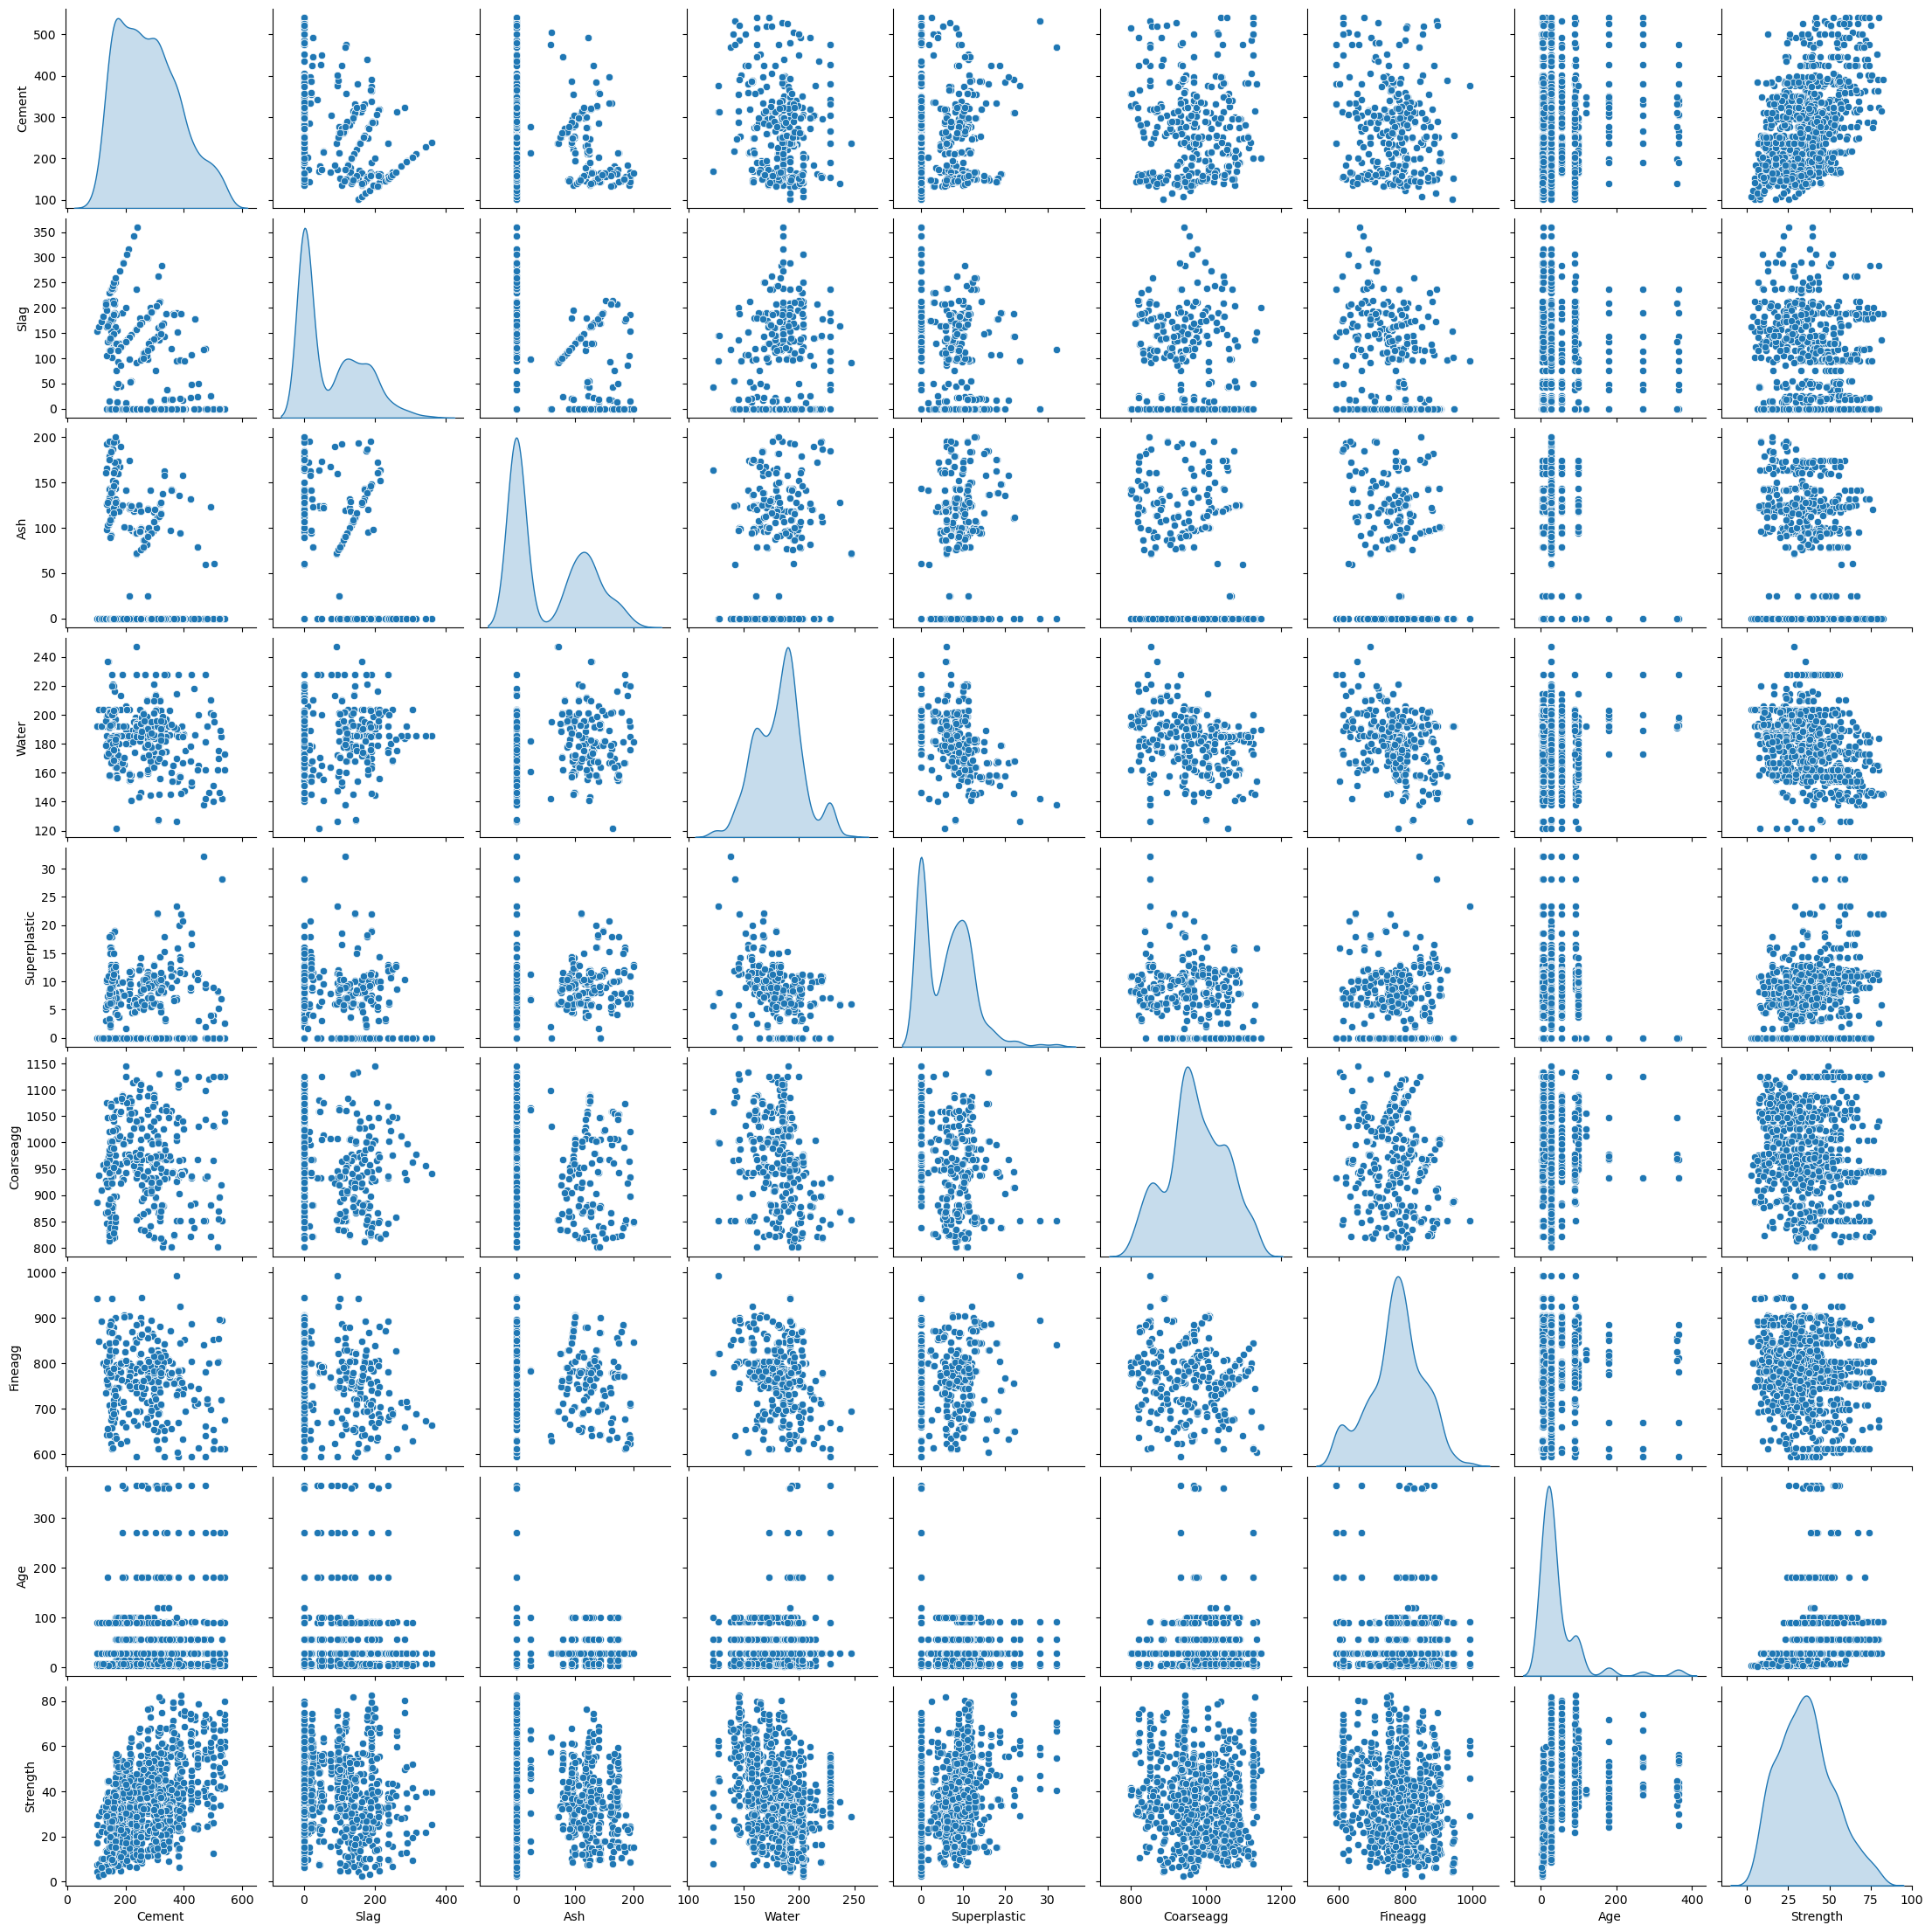

In [45]:
plt.figure(figsize=(6, 5))
sns.pairplot(data,diag_kind='kde')

### HEATMAP

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

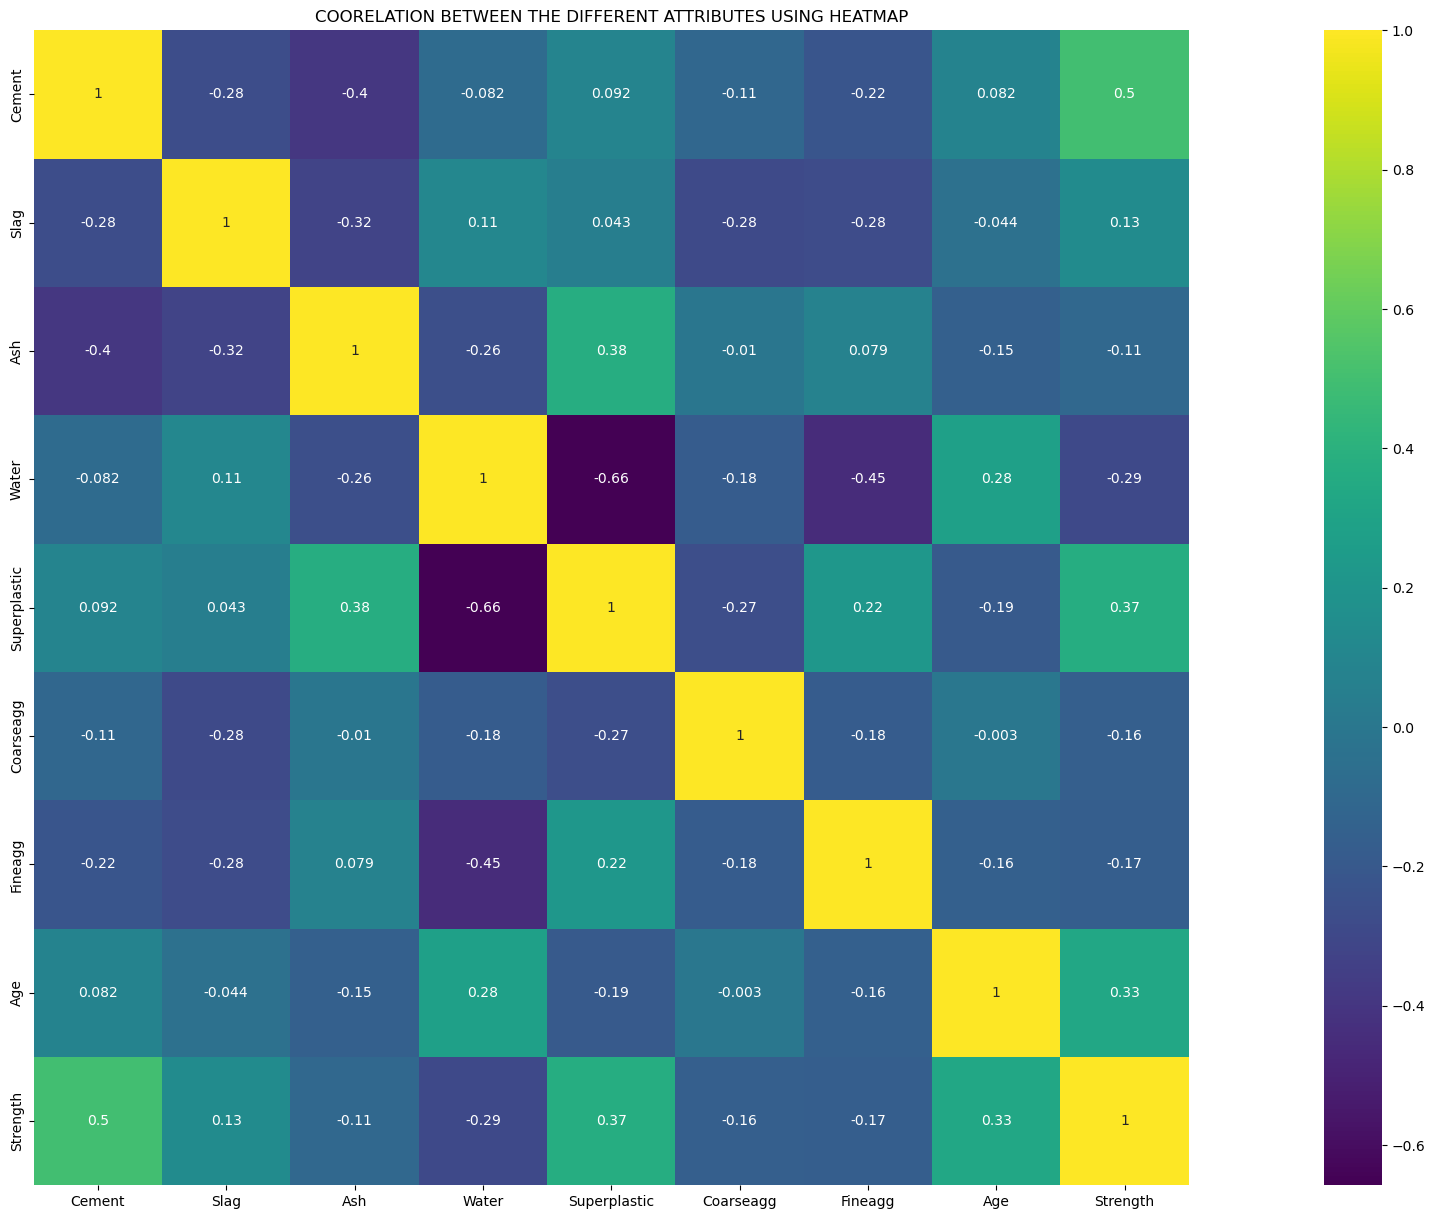

In [46]:
#COORELATION BETWEEN VARIABLE USING HEATMAP
plt.figure(figsize=(35,15))
sns.heatmap(data.corr(),vmax=1,cmap='viridis',annot=True,square=True)
plt.title('COORELATION BETWEEN THE DIFFERENT ATTRIBUTES USING HEATMAP')
plt.show()

<Axes: >

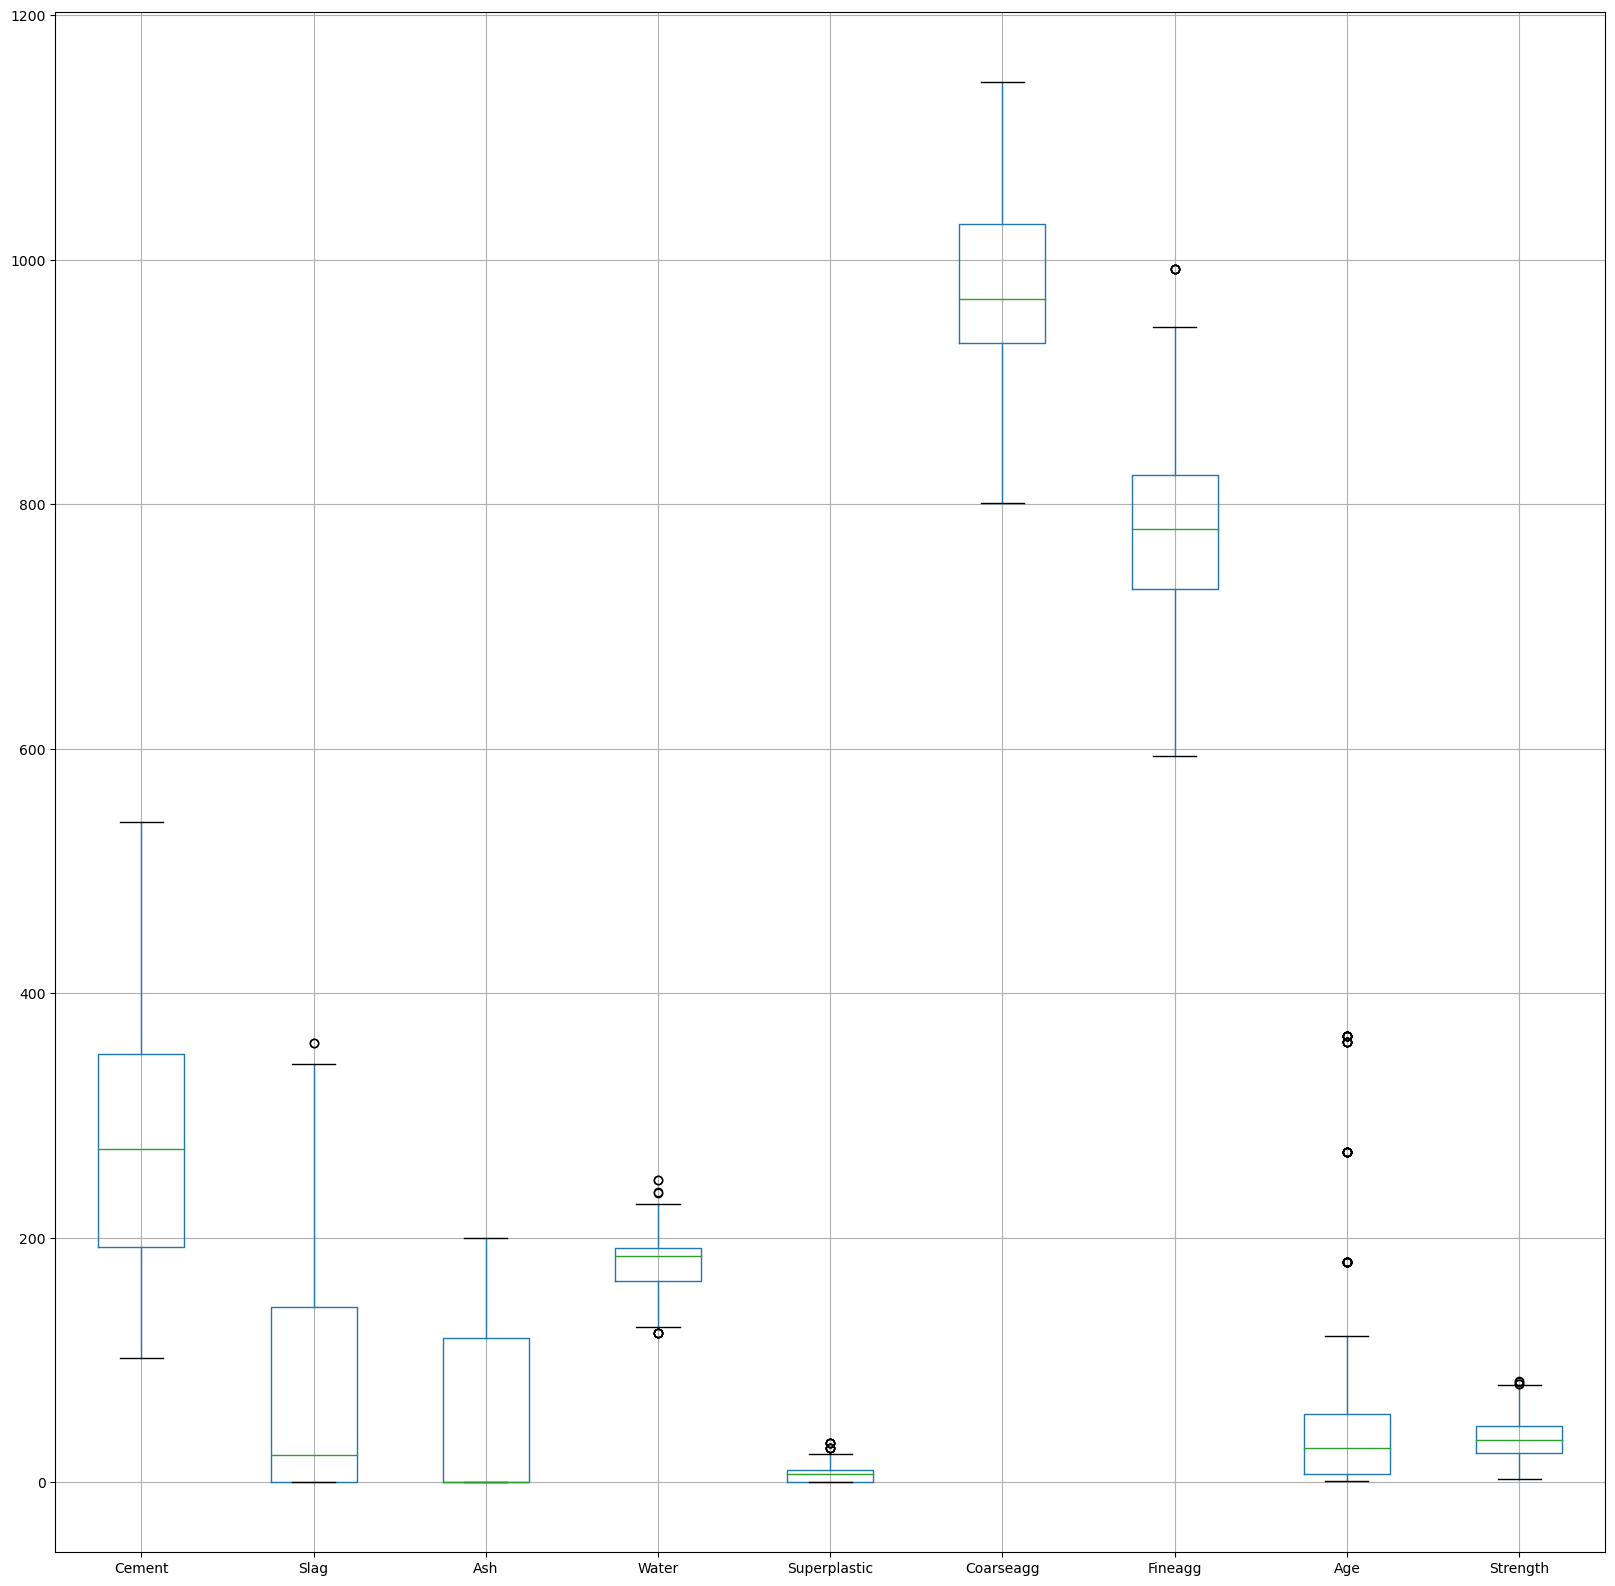

In [47]:
#USING BOXPLOT TO SEE THE VARIOUS OUTLIERS WHICH IS PRESENT IN THE DATASET.
data.boxplot(figsize=(20,20))

In [48]:
print('These are the outliers for the above portion only\n')
print('Outliers in cement',data[((data['Cement']-data['Cement'].mean())/data['Cement'].std()).abs()>3]['Cement'].count())
print('Outliers in Slag',data[((data['Slag']-data['Slag'].mean())/data['Slag'].std()).abs()>3]['Slag'].count())
print('Outliers in Ash',data[((data['Ash']-data['Ash'].mean())/data['Ash'].std()).abs()>3]['Ash'].count())
print('Outliers in Water',data[((data['Water']-data['Water'].mean())/data['Water'].std()).abs()>3]['Water'].count())
print('Outliers in Superplastic',data[((data['Superplastic']-data['Superplastic'].mean())/data['Superplastic'].std()).abs()>3]
      ['Superplastic'].count())
print('Outliers in Coarseagg',data[((data['Coarseagg']-data['Coarseagg'].mean())/data['Coarseagg'].std()).abs()>3]
      ['Coarseagg'].count())
print('Outliers in Fineagg',data[((data['Fineagg']-data['Fineagg'].mean())/data['Fineagg'].std()).abs()>3]['Fineagg'].count())
print('Outliers in Age',data[((data['Age']-data['Age'].mean())/data['Age'].std()).abs()>3]['Age'].count())


These are the outliers for the above portion only

Outliers in cement 0
Outliers in Slag 4
Outliers in Ash 0
Outliers in Water 2
Outliers in Superplastic 10
Outliers in Coarseagg 0
Outliers in Fineagg 0
Outliers in Age 33


## REPLACING THE OUTLIERS BY THE MEDIAN OF THE COLUMNS

In [49]:
for cols in data.columns[:-1]:
    Q1 = data[cols].quantile(0.25)
    Q3 = data[cols].quantile(0.75)
    iqr = Q3 - Q1

    low = Q1-1.5*iqr
    high = Q3+1.5*iqr
    data.loc[(data[cols] < low) | (data[cols] > high), cols] = data[cols].median()    
    



<Axes: >

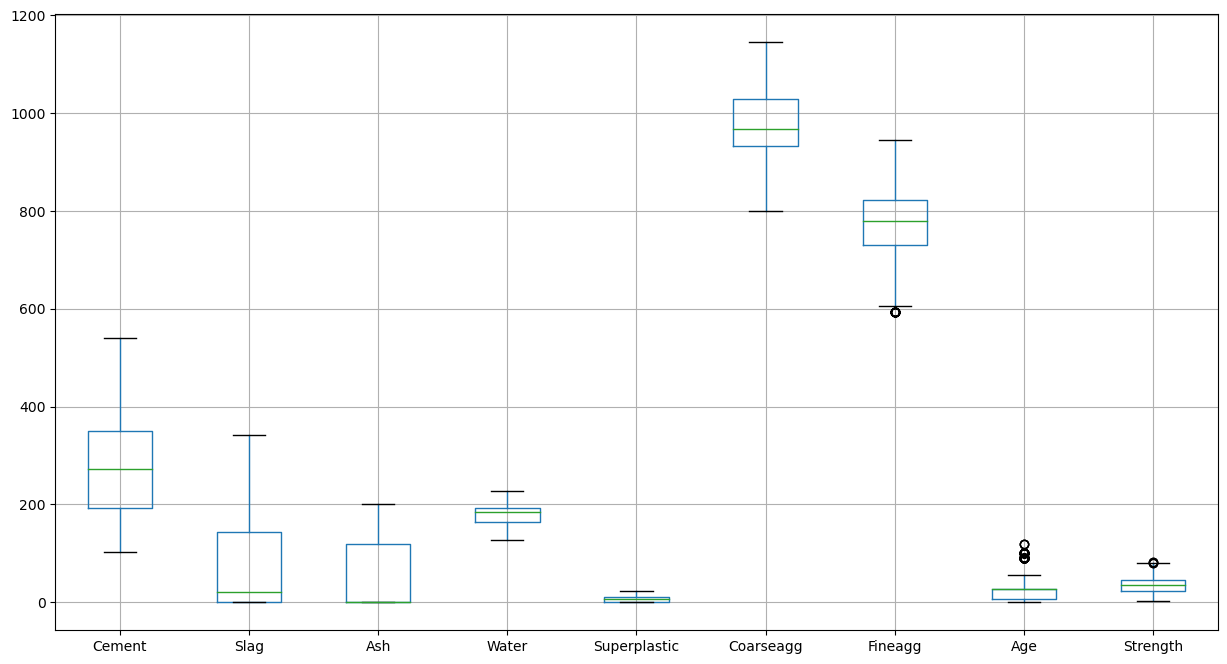

In [50]:
data.boxplot(figsize=(15,8))  # Now there is no outlier in the different column

# FEATURE ENGINEERING AND MODEL BUILDING

In [51]:
# SPILLITING THE DATA INTO TRAGET VARAIBALE AND INDEPENDENT VARIABLE (X,Y)

In [52]:
y = data['Strength']

In [53]:
y.head(2)

0    79.99
1    61.89
Name: Strength, dtype: float64

In [54]:
x = data.drop('Strength',axis=1)

In [55]:
x.head(2)

,Cement,Slag,Ash,Water,Superplastic,Coarseagg,Fineagg,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28


In [56]:
from scipy.stats import zscore
Xscaled = x.apply(zscore)

In [57]:
Xscaled.head(4)

,Cement,Slag,Ash,Water,Superplastic,Coarseagg,Fineagg,Age
0,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,0.863154,-1.227306,-0.153159
1,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,1.056164,-1.227306,-0.153159
2,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159
3,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159


In [58]:
# WITH THE HELP OF TRAIN TEST SPLIT WE DIVIDE OUR TRAINING AND TESTING DATA 
x_train,x_test,y_train,y_test = train_test_split(Xscaled,y,random_state=1,test_size=0.3)

<IPython.core.display.Javascript object>

In [59]:
x_train.head(3)

,Cement,Slag,Ash,Water,Superplastic,Coarseagg,Fineagg,Age
185,-0.562611,-0.858192,0.664598,0.371331,-0.269174,-0.074874,1.242661,-0.656933
286,-0.955122,-0.858192,1.763621,-0.585295,0.297088,1.063885,0.066789,-0.153159
600,0.553653,-0.858192,-0.847144,0.745241,-1.091166,-0.063294,0.107468,-0.656933


# BUILDING DIFFERENT MODELS

## RANDOM FOREST

In [60]:
model1 = RandomForestRegressor()
model1.fit(x_train,y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [61]:
y_pred = model1.predict(x_test) # Here we make some predictions based of the x_test data

In [62]:
y_pred

array([22.9678    , 12.7085    , 24.137     , 12.0523    , 31.22813   ,
       63.0255    , 19.5851    , 49.50850262, 39.3497    , 19.246     ,
       35.688     , 13.3549    , 38.547475  , 32.44211111, 12.0758    ,
       27.2649    , 35.00477722, 54.8097    , 59.3873    , 29.3967    ,
       24.3783    , 50.9594    , 16.1466    , 57.64495   , 62.837075  ,
       44.3932681 , 35.70185   , 32.1853    , 34.7255    , 12.8933    ,
       38.96131667, 51.32375   , 28.92991333, 20.5491    , 34.556     ,
       37.2899    , 15.6593    , 28.682465  , 24.3011    , 11.3806    ,
       30.2164    , 15.2733    , 47.14315   , 35.85080833, 30.7639    ,
       26.514     , 32.856375  , 24.        , 33.33253333, 50.8678    ,
       26.75196667, 34.698175  , 64.1152    , 54.8923    , 60.01065   ,
        9.2282    , 30.0704    , 22.7709    , 31.2282    , 43.9355    ,
       45.12875738, 39.62814833, 50.1874    , 49.4232    , 27.7955    ,
       34.6316    , 64.1152    , 38.805     , 49.10431381, 25.84

In [63]:
# MODEL PERFORMANCE ON TRAINING DATA
model1.score(x_train,y_train)

0.9808352642238329

In [64]:
# MODEL PERSORMANCE ON TESTING DATA
model1.score(x_test,y_test)

0.8747304141237462

In [65]:
# ACCURACY SCORE
acc_R = metrics.r2_score(y_test,y_pred)

<IPython.core.display.Javascript object>

In [66]:
acc_R

0.8747304141237462

In [67]:
error = metrics.mean_squared_error(y_test,y_pred)

<IPython.core.display.Javascript object>

In [68]:
error

32.8340602755955

In [69]:
results = pd.DataFrame({'Algorithm':['Random Forest'],'Accuracy':acc_R},index=['1'])
result1 = results[['Algorithm','Accuracy']]
result1

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,Random Forest,0.87473


### K-FOLD CROSS VALIDATION

In [70]:
k = 20
kfold = KFold(n_splits=k)
k_result = cross_val_score(model1,x,y,cv=kfold)
accuracy = np.mean(k_result)
accuracy


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7659409763884695

In [71]:
k_result

array([0.6047035 , 0.83199829, 0.40672629, 0.95806953, 0.77792465,
       0.83556064, 0.64606289, 0.69620714, 0.4465263 , 0.56690494,
       0.78447624, 0.6638501 , 0.87622814, 0.85335679, 0.86195777,
       0.84619804, 0.89515804, 0.9423161 , 0.87442558, 0.95016856])

In [72]:
random_re = pd.DataFrame({'Algorithm': ['Random Forest Regressor k_fold'], 'Accuracy': accuracy},index=['2'])
results = pd.concat([result1, random_re])
result2 = results[['Algorithm','Accuracy']]
result2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,Random Forest,0.874730
2,Random Forest Regressor k_fold,0.765941


## GRADIENT BOOSTING REGRESSOR

In [73]:
model2 = GradientBoostingRegressor()
model2.fit(x_train,y_train)

<IPython.core.display.Javascript object>

GradientBoostingRegressor()

In [74]:
y_pred_gbr = model2.predict(x_test)

In [75]:
y_pred_gbr

array([21.04477264, 11.0540898 , 24.93802964, 15.09706139, 34.360359  ,
       64.58199108, 16.88267942, 46.91376267, 39.69978845, 20.29262918,
       35.21289911, 14.95686266, 36.78184264, 30.85601521,  7.34770117,
       27.6408574 , 35.03051287, 59.76391896, 56.14803812, 33.05149908,
       21.84076414, 52.1361642 , 17.67671645, 62.24226368, 59.23600929,
       41.13211954, 34.07364711, 32.87163905, 36.03840606, 13.81397028,
       43.34066562, 54.02772706, 30.87924056, 25.33567063, 35.32248404,
       37.77816301, 17.74127717, 28.27629849, 23.63996804, 17.16484579,
       39.75273174, 14.35494827, 46.99056601, 36.44119111, 32.72559266,
       27.46629941, 34.94034042, 25.86784887, 32.36979266, 51.89009464,
       26.60811278, 37.30573428, 55.57383723, 45.00487233, 57.58443538,
        8.83975697, 36.60960573, 22.05773918, 31.39855399, 44.65348367,
       43.29209558, 41.41563669, 52.7534638 , 48.72456403, 22.22532404,
       35.38823538, 55.57383723, 35.4237606 , 40.95674816, 27.40

In [76]:
model2.score(x_train,y_train)

0.9477368610390589

In [77]:
model2.score(x_test,y_test)

0.8800584462425194

In [78]:
acc_gbr =metrics.r2_score(y_test,y_pred_gbr) 

<IPython.core.display.Javascript object>

In [79]:
acc_gbr

0.8800584462425194

In [80]:
error = metrics.mean_squared_error(y_test,y_pred_gbr)

<IPython.core.display.Javascript object>

In [81]:
error

31.43754470069033

In [82]:
result3 = pd.DataFrame({'Algorithm':'Gradient Boosting Regressor','Accuracy':acc_gbr},index=['3'])
results = pd.concat([result2,result3])
results = results[['Algorithm','Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,Random Forest,0.874730
2,Random Forest Regressor k_fold,0.765941
3,Gradient Boosting Regressor,0.880058


### K-FOLD CROSS VALIDATION

In [83]:
k = 20
kfold=KFold(n_splits=k)
k_fold_result=cross_val_score(model2,x,y,cv=kfold)
accuracy = np.mean(k_fold_result)
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.7709124236579644

In [84]:
result4 = pd.DataFrame({'Algorithm':'GRADIENT BOOSTING REGRESSOR K-FOLD','Accuracy':accuracy},index=['4'])
results = pd.concat([results,result4])
results=results[['Algorithm','Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,Random Forest,0.874730
2,Random Forest Regressor k_fold,0.765941
3,Gradient Boosting Regressor,0.880058
4,GRADIENT BOOSTING REGRESSOR K-FOLD,0.770912


## ADA BOOST REGRESSOR

In [85]:
from sklearn.ensemble import AdaBoostRegressor
model3 = AdaBoostRegressor()
model3.fit(x_train,y_train)

AdaBoostRegressor()

In [86]:
y_pred_ada = model3.predict(x_test)

In [87]:
y_pred_ada

array([23.92677966, 19.65965116, 30.21509317, 20.84582734, 32.91494424,
       57.20596899, 23.92677966, 43.13933852, 43.79746269, 23.15076923,
       37.75854545, 20.45183673, 40.17232604, 32.48633333, 20.09486486,
       32.91494424, 38.185     , 50.42636364, 58.97266187, 36.01392157,
       23.84186441, 46.9385    , 23.56180723, 63.05297659, 58.01636364,
       39.86566667, 32.53268657, 38.16325843, 39.08442308, 19.67982301,
       46.07522388, 48.90785408, 32.53268657, 28.78769231, 40.27681818,
       40.80471545, 20.90354331, 34.76382353, 32.25912951, 15.73066667,
       39.52236842, 19.6792    , 52.01862069, 42.69068493, 35.00628205,
       32.53268657, 41.03029536, 30.21509317, 36.6549505 , 47.2752381 ,
       28.0273301 , 39.05444444, 48.57913242, 46.07522388, 58.01636364,
       18.43195312, 38.16325843, 23.84186441, 34.76382353, 44.55135922,
       36.93422535, 46.07522388, 46.77315789, 44.80885135, 30.21509317,
       32.91494424, 48.57913242, 33.38027778, 44.33089744, 27.39

In [88]:
model3.score(x_train,y_train)

0.8195188845054366

In [89]:
model3.score(x_test,y_test)

0.761205207253378

In [90]:
acc_ada=metrics.r2_score(y_test,y_pred_ada)

<IPython.core.display.Javascript object>

In [91]:
acc_ada

0.761205207253378

In [92]:
error= metrics.mean_squared_error(y_test,y_pred_ada)

<IPython.core.display.Javascript object>

In [93]:
error

62.58983426580633

In [94]:
result5 = pd.DataFrame({'Algorithm':'Ada Boost Regressor','Accuracy':acc_ada},index=['5'])
results = pd.concat([results,result5])
results = results[['Algorithm','Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,Random Forest,0.874730
2,Random Forest Regressor k_fold,0.765941
3,Gradient Boosting Regressor,0.880058
4,GRADIENT BOOSTING REGRESSOR K-FOLD,0.770912
5,Ada Boost Regressor,0.761205


### K-FOLD CROSS VALIDATION

In [95]:
k=20
kfold=KFold(n_splits=k)
k_fold_results=cross_val_score(model3,x,y,cv=kfold)
accuracy = np.mean(k_fold_results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [96]:
accuracy

0.5726120442928945

In [97]:
result6 = pd.DataFrame({'Algorithm':'Ada Boost Regressor K-Fold','Accuracy':accuracy},index=['6'])
results=pd.concat([results,result6])
results = results[['Algorithm','Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,Random Forest,0.874730
2,Random Forest Regressor k_fold,0.765941
3,Gradient Boosting Regressor,0.880058
4,GRADIENT BOOSTING REGRESSOR K-FOLD,0.770912
5,Ada Boost Regressor,0.761205
6,Ada Boost Regressor K-Fold,0.572612


## KNN REGRESSOR

In [98]:
# checking for different values of neighbors to determine the best number of neighbors
from sklearn.neighbors import KNeighborsRegressor
diff_k=[]
for i in range(1,45):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    diff_k.append(np.mean(pred_i!=y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Mean errors')

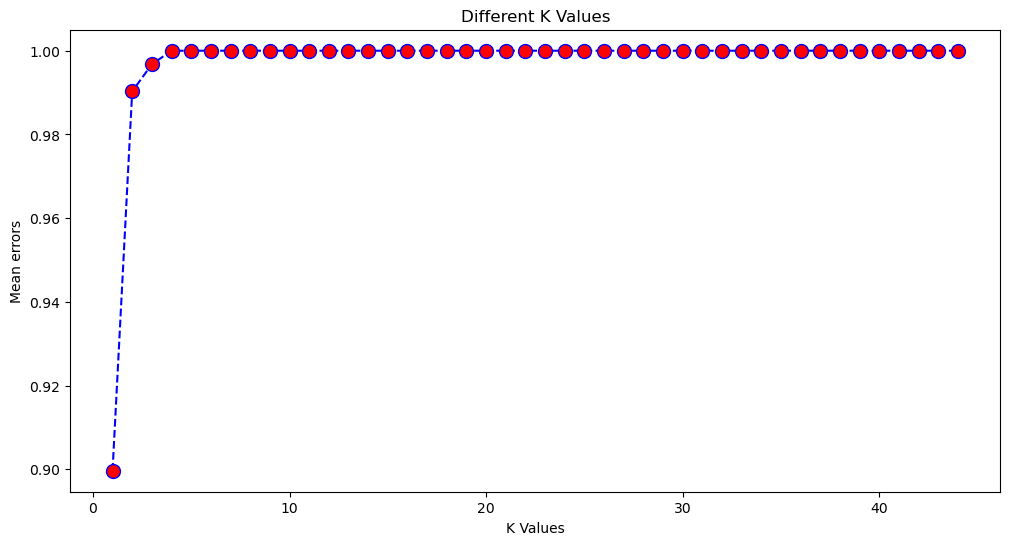

In [99]:
plt.figure(figsize=(12,6))
plt.plot(range(1,45),diff_k,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean errors')

In [100]:
# we can take the value of k = 3

model4 = KNeighborsRegressor(n_neighbors=3)
model4.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [101]:
y_pred_knn = model4.predict(x_test)

In [102]:
y_pred_knn

array([17.45333333, 16.        , 23.63666667, 12.26      , 31.11333333,
       67.41      , 17.54      , 52.97333333, 38.61      , 27.07      ,
       43.60666667,  7.5       , 42.92666667, 25.75333333, 11.66666667,
       21.14333333, 35.11      , 53.88333333, 37.81333333, 25.        ,
       20.72666667, 43.88      , 16.56      , 45.22666667, 63.26666667,
       47.58333333, 36.17666667, 33.93666667, 37.08      , 12.82      ,
       39.81333333, 46.72333333, 23.42      , 28.32666667, 43.93333333,
       31.14333333, 18.95333333, 24.96666667, 33.28333333, 22.86666667,
       51.3       , 16.35      , 46.42666667, 37.64      , 33.02      ,
       33.08      , 32.67666667, 25.37      , 44.86      , 42.38333333,
       26.19333333, 36.77333333, 56.89      , 45.41      , 60.13333333,
       14.07      , 52.36      , 19.06      , 35.16      , 39.51333333,
       46.15      , 39.52      , 50.65333333, 51.04      , 25.17333333,
       38.24      , 56.89      , 37.38666667, 52.97333333, 23.51

In [103]:
model4.score(x_train,y_train)

0.9069857173257587

In [104]:
model4.score(x_test,y_test)

0.7538075164015781

In [105]:
acc_knn = metrics.r2_score(y_test,y_pred_knn)

<IPython.core.display.Javascript object>

In [106]:
acc_knn

0.7538075164015781

In [107]:
error = metrics.mean_squared_error(y_test,y_pred_knn)

<IPython.core.display.Javascript object>

In [108]:
error

64.52882229413879

In [109]:
result7 = pd.DataFrame({'Algorithm':'KNN Regressor','Accuracy':acc_knn},index=['7'])
results = pd.concat([results,result7])
results = results[['Algorithm','Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,Random Forest,0.874730
2,Random Forest Regressor k_fold,0.765941
3,Gradient Boosting Regressor,0.880058
4,GRADIENT BOOSTING REGRESSOR K-FOLD,0.770912
5,Ada Boost Regressor,0.761205
6,Ada Boost Regressor K-Fold,0.572612
7,KNN Regressor,0.753808


### K-FOLD CROSS VALIDATION

In [110]:
k = 20
kfold = KFold(n_splits=k)
k_fold_knn = cross_val_score(model4,x,y,cv=kfold)
accuracy = np.mean(abs(k_fold_knn))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.6907963408592752

In [111]:
result8 = pd.DataFrame({'Algorithm':'KNN Regressor K-Fold','Accuracy':accuracy},index=['8'])
results = pd.concat([results,result8])
results = results[['Algorithm','Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,Random Forest,0.874730
2,Random Forest Regressor k_fold,0.765941
3,Gradient Boosting Regressor,0.880058
4,GRADIENT BOOSTING REGRESSOR K-FOLD,0.770912
5,Ada Boost Regressor,0.761205
6,Ada Boost Regressor K-Fold,0.572612
7,KNN Regressor,0.753808
8,KNN Regressor K-Fold,0.690796


## BAGGING REGRESSOR

In [112]:
from sklearn.ensemble import BaggingRegressor

model5 =BaggingRegressor()
model5.fit(x_train,y_train)

BaggingRegressor()

In [113]:
y_pred_bag = model5.predict(x_test)

In [114]:
y_pred_bag

array([22.01      , 12.158     , 23.019     , 11.888     , 36.59      ,
       62.36      , 17.955     , 47.96626667, 40.28      , 19.246     ,
       36.092     , 13.058     , 40.339     , 31.665     , 12.046     ,
       26.302     , 36.49058333, 55.415     , 56.587     , 30.538     ,
       26.056     , 49.946     , 16.643     , 61.425     , 64.581     ,
       45.026     , 33.033     , 30.261     , 38.9885    , 12.431     ,
       38.02183333, 52.09      , 29.903     , 20.871     , 35.626     ,
       38.263     , 14.971     , 28.11814286, 23.041     , 10.94      ,
       33.062     , 14.453     , 48.531     , 35.944     , 33.563     ,
       28.917     , 33.10608333, 23.694     , 34.47533333, 49.132     ,
       25.718     , 35.314     , 63.142     , 57.167     , 61.548     ,
        9.167     , 34.145     , 21.313     , 32.893     , 42.623     ,
       45.08086429, 39.81875   , 49.6       , 45.754     , 25.633     ,
       34.479     , 63.142     , 38.788     , 49.07      , 27.50

In [115]:
model5.score(x_train,y_train)

0.9755227751529303

In [116]:
model5.score(x_test,y_test)

0.8648499276055103

In [117]:
acc_bag = metrics.r2_score(y_test,y_pred_bag)

<IPython.core.display.Javascript object>

In [118]:
acc_bag

0.8648499276055103

In [119]:
error = metrics.mean_squared_error(y_test,y_pred_bag)

<IPython.core.display.Javascript object>

In [120]:
error

35.42380692178014

In [121]:
result9 = pd.DataFrame({'Algorithm':'Bagging Regressor','Accuracy':acc_bag},index=['9'])
results = pd.concat([results,result9])
results = results[['Algorithm','Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,Random Forest,0.874730
2,Random Forest Regressor k_fold,0.765941
3,Gradient Boosting Regressor,0.880058
4,GRADIENT BOOSTING REGRESSOR K-FOLD,0.770912
5,Ada Boost Regressor,0.761205
6,Ada Boost Regressor K-Fold,0.572612
7,KNN Regressor,0.753808
8,KNN Regressor K-Fold,0.690796
9,Bagging Regressor,0.864850


### K-FOLD CROSS VALIDATION

In [122]:
k = 20
kfold = KFold(n_splits=k)
k_fold_bag = cross_val_score(model5,x,y,cv = kfold)
accuracy = np.mean(abs(k_fold_bag))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [123]:
accuracy

0.7256397707640201

In [124]:
result10 = pd.DataFrame({'Algorithm':'Bagging Regressor K-fold','Accuracy':accuracy},index=['10'])
results = pd.concat([results,result10])
results = results[['Algorithm','Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,Random Forest,0.874730
2,Random Forest Regressor k_fold,0.765941
3,Gradient Boosting Regressor,0.880058
4,GRADIENT BOOSTING REGRESSOR K-FOLD,0.770912
5,Ada Boost Regressor,0.761205
6,Ada Boost Regressor K-Fold,0.572612
7,KNN Regressor,0.753808
8,KNN Regressor K-Fold,0.690796
9,Bagging Regressor,0.864850
10,Bagging Regressor K-fold,0.725640


## SUPPORT VECTOR MACHINE

In [125]:
from sklearn.svm import SVR
model6 =SVR(kernel='linear')
model6.fit(x_train,y_train)

SVR(kernel='linear')

In [126]:
y_pred_svm = model6.predict(x_test)

In [127]:
y_pred_svm

array([28.1475358 , 17.69421699, 23.30631382, 17.54963208, 33.9189637 ,
       59.37590005, 22.85964337, 27.10153291, 35.36015529, 31.6272437 ,
       44.03451029, 16.94137838, 30.58836881, 26.72529597, 11.66676247,
       26.89815529, 30.17029715, 55.00764464, 47.70347365, 31.37867462,
       19.1845716 , 40.60538388, 20.42069048, 47.65882889, 58.19153674,
       34.38491958, 28.74760978, 29.41345702, 33.25142072, 19.63527148,
       35.58199478, 49.19316953, 23.71816984, 28.44696541, 49.34296517,
       34.01098244, 22.34594984, 24.7243275 , 29.8998264 , 21.40411245,
       45.34419779, 21.020497  , 54.2956714 , 37.39749395, 29.89006623,
       32.70415815, 29.24063754, 27.25469948, 48.36908255, 40.64895569,
       21.68256916, 42.71596101, 48.5193904 , 44.09625612, 59.97579242,
       14.33907183, 44.06282543, 21.07417459, 34.43966966, 35.58333018,
       21.32905544, 37.38589399, 62.22016048, 49.69656915, 32.4906097 ,
       40.18250108, 48.5193904 , 31.37323657, 36.19492253, 22.54

In [128]:
model6.score(x_train,y_train)

0.7296525761559518

In [129]:
model6.score(x_test,y_test)

0.6549962611822532

In [130]:
acc_svm = metrics.r2_score(y_test,y_pred_svm)

<IPython.core.display.Javascript object>

In [131]:
acc_svm

0.6549962611822532

In [132]:
error = metrics.mean_squared_error(y_test,y_pred_svm)

<IPython.core.display.Javascript object>

In [133]:
error

90.42796363067586

In [134]:
result11 = pd.DataFrame({'Algorithm':'Support Vector Regressor','Accuracy':acc_svm},index=['11'])
results = pd.concat([results,result11])
results = results[['Algorithm','Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,Random Forest,0.874730
2,Random Forest Regressor k_fold,0.765941
3,Gradient Boosting Regressor,0.880058
4,GRADIENT BOOSTING REGRESSOR K-FOLD,0.770912
5,Ada Boost Regressor,0.761205
6,Ada Boost Regressor K-Fold,0.572612
7,KNN Regressor,0.753808
8,KNN Regressor K-Fold,0.690796
9,Bagging Regressor,0.864850
10,Bagging Regressor K-fold,0.725640


### K-FOLD CROSS VALIDATION

In [135]:
k= 20
kfold = KFold(n_splits=k)
k_fold_svm = cross_val_score(model6,x,y,cv=kfold)
accoracy = np.mean(abs(k_fold_svm))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [136]:
accoracy

0.6153727431770614

In [137]:
result12= pd.DataFrame({'Algorithm':'Support Vector Regressor K-Fold','Accuracy':accoracy},index=['12'])
results = pd.concat([results,result12])
results = results[['Algorithm','Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,Random Forest,0.874730
2,Random Forest Regressor k_fold,0.765941
3,Gradient Boosting Regressor,0.880058
4,GRADIENT BOOSTING REGRESSOR K-FOLD,0.770912
5,Ada Boost Regressor,0.761205
6,Ada Boost Regressor K-Fold,0.572612
7,KNN Regressor,0.753808
8,KNN Regressor K-Fold,0.690796
9,Bagging Regressor,0.864850
10,Bagging Regressor K-fold,0.725640


## XGBOOST REGRESSOR

In [138]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
model7 = XGBRegressor()
model7.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [139]:
y_pred_xgb = model7.predict(x_test)

In [140]:
y_pred_xgb

array([22.531141 , 14.107359 , 25.306595 , 15.045836 , 29.912867 ,
       70.047165 , 15.357485 , 53.05174  , 39.75462  , 20.550436 ,
       37.673027 , 15.007248 , 35.86751  , 32.14172  , 11.207221 ,
       26.569946 , 35.05911  , 56.038128 , 58.95625  , 28.804052 ,
       22.44881  , 48.68404  , 15.62037  , 63.666256 , 58.964294 ,
       45.87418  , 35.409447 , 32.20564  , 33.453293 , 14.576983 ,
       38.838436 , 52.899017 , 30.888056 , 22.703564 , 33.30736  ,
       35.61465  , 18.444565 , 23.943447 , 24.603006 ,  9.4679575,
       33.319603 , 15.336073 , 51.68595  , 37.71269  , 33.226486 ,
       23.10661  , 32.1854   , 25.320404 , 27.935177 , 46.65915  ,
       25.891544 , 35.959766 , 65.80412  , 55.304443 , 61.38002  ,
        9.717003 , 33.81797  , 23.45155  , 28.668161 , 46.097992 ,
       46.065544 , 39.565304 , 51.05664  , 55.04187  , 25.308662 ,
       36.015564 , 65.80412  , 36.90905  , 47.491695 , 23.3167   ,
       32.104607 , 27.892574 , 35.61465  , 10.176068 , 72.2041

In [141]:
model7.score(x_train,y_train)

0.992400687042809

In [142]:
model7.score(x_test,y_test)

0.8848170780709802

In [143]:
acc_xgb = metrics.r2_score(y_test,y_pred_xgb)

<IPython.core.display.Javascript object>

In [144]:
acc_xgb

0.8848170780709802

In [145]:
error = metrics.mean_squared_error(y_test,y_pred_xgb)

<IPython.core.display.Javascript object>

In [146]:
error

30.19027304099638

In [147]:
result13= pd.DataFrame({'Algorithm':'XGBoost Regressor','Accuracy':acc_xgb},index=['13'])
results = pd.concat([results,result13])
results = results[['Algorithm','Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,Random Forest,0.874730
2,Random Forest Regressor k_fold,0.765941
3,Gradient Boosting Regressor,0.880058
4,GRADIENT BOOSTING REGRESSOR K-FOLD,0.770912
5,Ada Boost Regressor,0.761205
6,Ada Boost Regressor K-Fold,0.572612
7,KNN Regressor,0.753808
8,KNN Regressor K-Fold,0.690796
9,Bagging Regressor,0.864850
10,Bagging Regressor K-fold,0.725640


### K-FOLD CROSS VALIDATION

In [148]:
k =20
kfold=KFold(n_splits=k)
k_fold_xgb = cross_val_score(model7,x,y,cv=kfold)
accuracy=np.mean(abs(k_fold_xgb))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [149]:
accuracy

0.7742736178500986

In [150]:
result14= pd.DataFrame({'Algorithm':'XGBoost Regressor K-Fold','Accuracy':accuracy},index=['14'])
results = pd.concat([results,result14])
results = results[['Algorithm','Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,Random Forest,0.874730
2,Random Forest Regressor k_fold,0.765941
3,Gradient Boosting Regressor,0.880058
4,GRADIENT BOOSTING REGRESSOR K-FOLD,0.770912
5,Ada Boost Regressor,0.761205
6,Ada Boost Regressor K-Fold,0.572612
7,KNN Regressor,0.753808
8,KNN Regressor K-Fold,0.690796
9,Bagging Regressor,0.864850
10,Bagging Regressor K-fold,0.725640


## DECISIONTREE REGRESSOR

In [151]:
from sklearn.tree import DecisionTreeRegressor
model8 = DecisionTreeRegressor()
model8.fit(x_train,y_train)

DecisionTreeRegressor()

In [152]:
y_pred_tree=model8.predict(x_test)

In [153]:
y_pred_tree

array([23.52      , 12.18      , 23.52      ,  8.        , 27.23      ,
       66.82      , 30.28      , 50.46      , 39.05      , 21.48      ,
       39.61      , 15.07      , 46.23      , 26.92      , 12.05      ,
       26.86      , 35.11      , 56.81      , 67.87      , 38.6       ,
       24.28      , 51.43      , 17.24      , 49.9       , 60.29      ,
       46.24      , 33.31      , 35.08      , 32.88      , 12.47      ,
       38.8       , 50.24      , 45.71      , 27.42      , 33.4       ,
       49.77      , 17.17      , 24.9       , 25.56      , 12.47      ,
       22.5       , 15.05      , 51.11333333, 40.87      , 34.67      ,
       33.05      , 31.84      , 19.01      , 34.4       , 51.43      ,
       28.71      , 38.7       , 67.11      , 55.16      , 61.215     ,
        9.31      , 35.1       , 22.72      , 43.25      , 42.55      ,
       46.15      , 39.635     , 54.32      , 53.77      , 21.91      ,
       33.76      , 67.11      , 29.07      , 71.7       , 25.37

In [154]:
model8.score(x_train,y_train)

0.9930841416603411

In [155]:
model8.score(x_test,y_test)

0.7464212715320723

In [156]:
print('Features importance in decision tree\n',pd.DataFrame(model8.feature_importances_,columns=['Importance'],index=x_train.columns))

<IPython.core.display.Javascript object>

Features importance in decision tree
               Importance
Cement          0.308337
Slag            0.059080
Ash             0.009650
Water           0.121997
Superplastic    0.050606
Coarseagg       0.027581
Fineagg         0.049766
Age             0.372983


In [157]:
acc_tree =metrics.r2_score(y_test,y_pred_tree)

<IPython.core.display.Javascript object>

In [158]:
acc_tree

0.7464212715320723

In [159]:
error = metrics.mean_squared_error(y_test,y_pred_tree)

<IPython.core.display.Javascript object>

In [160]:
error

66.46481024811219

In [161]:
result15= pd.DataFrame({'Algorithm':'DecisionTree Regressor','Accuracy':acc_tree},index=['15'])
results = pd.concat([results,result15])
results = results[['Algorithm','Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,Random Forest,0.874730
2,Random Forest Regressor k_fold,0.765941
3,Gradient Boosting Regressor,0.880058
4,GRADIENT BOOSTING REGRESSOR K-FOLD,0.770912
5,Ada Boost Regressor,0.761205
6,Ada Boost Regressor K-Fold,0.572612
7,KNN Regressor,0.753808
8,KNN Regressor K-Fold,0.690796
9,Bagging Regressor,0.864850
10,Bagging Regressor K-fold,0.725640


### K-FOLD CROSS VALIDATION

In [162]:
k =18
kfold=KFold(n_splits=k)
k_fold_tree = cross_val_score(model8,x,y,cv=kfold)
accuracy=np.mean(abs(k_fold_tree))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [163]:
accuracy

0.6305037154690528

In [164]:
result16= pd.DataFrame({'Algorithm':'DecisionTree Regressor K-Fold','Accuracy':accuracy},index=['16'])
results = pd.concat([results,result16])
results = results[['Algorithm','Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,Random Forest,0.874730
2,Random Forest Regressor k_fold,0.765941
3,Gradient Boosting Regressor,0.880058
4,GRADIENT BOOSTING REGRESSOR K-FOLD,0.770912
5,Ada Boost Regressor,0.761205
6,Ada Boost Regressor K-Fold,0.572612
7,KNN Regressor,0.753808
8,KNN Regressor K-Fold,0.690796
9,Bagging Regressor,0.864850
10,Bagging Regressor K-fold,0.725640


### AFTER USING ONLY IMPORTANCE FEATURE

In [165]:
df = data.copy() ##create a copy of df in order to drop the least important features and work on only the important features

In [166]:
df.head(4)

,Cement,Slag,Ash,Water,Superplastic,Coarseagg,Fineagg,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05


In [167]:
x1 = df.drop(['Ash','Coarseagg','Fineagg','Strength'],axis=1)
y1=data['Strength']

In [168]:
x1.head(3)

,Cement,Slag,Water,Superplastic,Age
0,540.0,0.0,162.0,2.5,28
1,540.0,0.0,162.0,2.5,28
2,332.5,142.5,228.0,0.0,28


In [169]:
y1.head(3)

0    79.99
1    61.89
2    40.27
Name: Strength, dtype: float64

In [170]:
x1scaled = x1.apply(zscore)

In [171]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1scaled,y,random_state=1,test_size=0.3)

<IPython.core.display.Javascript object>

In [172]:
dec_fe_model = DecisionTreeRegressor()
dec_fe_model.fit(x_train1,y_train1)

DecisionTreeRegressor()

In [173]:
y_pred_dec_fea=dec_fe_model.predict(x_test1)

In [174]:
y_pred_dec_fea

array([23.8       , 13.12      , 23.69      , 13.09      , 30.88      ,
       66.82      , 20.28      , 50.46      , 39.05      , 21.92      ,
       42.35      , 19.35      , 36.8       , 23.89      , 12.05      ,
       26.86      , 35.11      , 56.81      , 53.58      , 34.67      ,
       24.28      , 51.43      , 16.26      , 61.23      , 60.29      ,
       46.24      , 23.74      , 14.54      , 33.4       , 12.47      ,
       38.8       , 50.24      , 25.75      , 27.42      , 33.4       ,
       32.4       , 17.17      , 25.18      , 26.23      ,  7.75      ,
       35.1       , 15.46      , 40.93      , 40.87      , 34.67      ,
       18.28      , 31.84      , 23.6       , 33.4       , 50.08      ,
       24.48      , 32.92      , 67.11      , 55.16      , 68.5       ,
       10.03      , 35.1       , 22.72      , 31.02      , 47.74      ,
       46.15      , 39.635     , 54.32      , 53.77      , 19.01      ,
       33.76      , 67.11      , 41.2       , 31.97      , 25.37

In [175]:
dec_fe_model.score(x_train1,y_train1)

0.9911889880235539

In [176]:
dec_fe_model.score(x_test1,y_test1)

0.7839131974071489

In [177]:
acc_tree_fea = metrics.r2_score(y_test1,y_pred_dec_fea)

<IPython.core.display.Javascript object>

In [178]:
acc_tree_fea

0.7839131974071489

In [179]:
error = metrics.mean_squared_error(y_test1,y_pred_dec_fea)

<IPython.core.display.Javascript object>

In [180]:
error

56.637906571377194

In [181]:
result17= pd.DataFrame({'Algorithm':'DecisionTree Regressor with impfea','Accuracy':acc_tree_fea},index=['17'])
results = pd.concat([results,result17])
results = results[['Algorithm','Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,Random Forest,0.874730
2,Random Forest Regressor k_fold,0.765941
3,Gradient Boosting Regressor,0.880058
4,GRADIENT BOOSTING REGRESSOR K-FOLD,0.770912
5,Ada Boost Regressor,0.761205
6,Ada Boost Regressor K-Fold,0.572612
7,KNN Regressor,0.753808
8,KNN Regressor K-Fold,0.690796
9,Bagging Regressor,0.864850
10,Bagging Regressor K-fold,0.725640


### DECISION TREE WITH HYPERTUNING

In [182]:
x_train,x_test,y_train,y_test=train_test_split(Xscaled,y,test_size=0.30,random_state=1)

<IPython.core.display.Javascript object>

In [183]:
model_dec_pru = DecisionTreeRegressor(max_depth=4,random_state=1,min_samples_leaf=5,)

In [184]:
model_dec_pru.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [185]:
y_pred_pru = model_dec_pru.predict(x_test)

In [186]:
y_pred_pru

array([18.26261905, 12.556125  , 25.66043011, 12.556125  , 25.66043011,
       52.13809524, 18.26261905, 49.09033333, 38.28022727, 12.556125  ,
       38.5084375 , 12.556125  , 56.68983051, 25.66043011, 12.556125  ,
       25.66043011, 35.57860656, 52.13809524, 35.57860656, 25.51864865,
       25.51864865, 52.13809524, 18.26261905, 56.68983051, 56.68983051,
       35.57860656, 25.66043011, 37.45615385, 35.57860656, 12.556125  ,
       49.09033333, 56.68983051, 35.57860656, 12.556125  , 33.87833333,
       35.57860656, 12.556125  , 35.57860656, 25.66043011, 12.556125  ,
       18.26261905, 18.26261905, 35.57860656, 38.28022727, 25.51864865,
       25.66043011, 38.28022727, 25.66043011, 33.87833333, 52.13809524,
       35.57860656, 38.5084375 , 49.09033333, 49.09033333, 56.68983051,
       12.556125  , 18.26261905, 25.51864865, 38.5084375 , 52.13809524,
       35.57860656, 49.09033333, 49.09033333, 38.5084375 , 25.66043011,
       25.66043011, 49.09033333, 25.66043011, 49.09033333, 25.51

In [187]:
print('Important features\n',pd.DataFrame(model_dec_pru.feature_importances_,columns=['Importance'],index=x_train.columns))

<IPython.core.display.Javascript object>

Important features
               Importance
Cement          0.355615
Slag            0.000000
Ash             0.000000
Water           0.106034
Superplastic    0.035409
Coarseagg       0.000000
Fineagg         0.025055
Age             0.477887


In [188]:
model_dec_pru.score(x_train,y_train)

0.7578225840644413

In [189]:
model_dec_pru.score(x_test,y_test)

0.556820999525816

In [190]:
acc_pru_tree = metrics.r2_score(y_test,y_pred_pru)

<IPython.core.display.Javascript object>

In [191]:
acc_pru_tree

0.556820999525816

In [192]:
error = metrics.mean_squared_error(y_test,y_pred_pru)

<IPython.core.display.Javascript object>

In [193]:
error

116.16040647585388

In [194]:
result18= pd.DataFrame({'Algorithm':'DecisionTree Regressor after pruning','Accuracy':acc_pru_tree},index=['18'])
results = pd.concat([results,result18])
results = results[['Algorithm','Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,Random Forest,0.874730
2,Random Forest Regressor k_fold,0.765941
3,Gradient Boosting Regressor,0.880058
4,GRADIENT BOOSTING REGRESSOR K-FOLD,0.770912
5,Ada Boost Regressor,0.761205
6,Ada Boost Regressor K-Fold,0.572612
7,KNN Regressor,0.753808
8,KNN Regressor K-Fold,0.690796
9,Bagging Regressor,0.864850
10,Bagging Regressor K-fold,0.725640


### PLOTTING THE DECISION TREE

In [195]:
! pip install graphviz

In [196]:
! pip install pydot

In [197]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import graphviz
import pydot

In [198]:
feature_cols = Xscaled.columns

In [199]:
feature_cols

Index(['Cement', 'Slag', 'Ash', 'Water', 'Superplastic', 'Coarseagg',
       'Fineagg', 'Age'],
      dtype='object')

In [200]:
# ************************ WITH THE HELP OF THIS CODE WE CAN PLOT THE DECISON TREE.

# dot_data = StringIO()
# export_graphviz(model_dec_pru,out_file=dot_data,
#                 filled=True, rounded=True,
#                 special_characters=True,
#                 feature_names = feature_cols,class_names=['0','1'])
# (graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('concrete_pruned.png')
# Image(graph.create_png())

### K-FOLD CROSS VALIDATION FOR PRUNED DECISION TREE

In [201]:
k =20
kfold=KFold(n_splits=k)
k_fold_tree_pru = cross_val_score(model_dec_pru,x,y,cv=kfold)
accuracy=np.mean(abs(k_fold_tree_pru))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [202]:
accuracy

0.44792037352404224

In [203]:
result19= pd.DataFrame({'Algorithm':'DecisionTree Regressor K-Fold after pruning','Accuracy':accuracy},index=['19'])
results = pd.concat([results,result19])
results = results[['Algorithm','Accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,Accuracy
1,Random Forest,0.874730
2,Random Forest Regressor k_fold,0.765941
3,Gradient Boosting Regressor,0.880058
4,GRADIENT BOOSTING REGRESSOR K-FOLD,0.770912
5,Ada Boost Regressor,0.761205
6,Ada Boost Regressor K-Fold,0.572612
7,KNN Regressor,0.753808
8,KNN Regressor K-Fold,0.690796
9,Bagging Regressor,0.864850
10,Bagging Regressor K-fold,0.725640


In [204]:
data_sort = results.sort_values(by='Accuracy', ascending=False)

In [205]:
data_sort

,Algorithm,Accuracy
13,XGBoost Regressor,0.884817
3,Gradient Boosting Regressor,0.880058
1,Random Forest,0.874730
9,Bagging Regressor,0.864850
17,DecisionTree Regressor with impfea,0.783913
14,XGBoost Regressor K-Fold,0.774274
4,GRADIENT BOOSTING REGRESSOR K-FOLD,0.770912
2,Random Forest Regressor k_fold,0.765941
5,Ada Boost Regressor,0.761205
7,KNN Regressor,0.753808


## XGBoost Regressor, Gradient Boosting Regressor, Random Forest and Bagging Regressor seems to do well in the scenario We can choose either of them.